<a href="https://colab.research.google.com/github/Jvab1609/FCMP_5-sem/blob/main/Intelig%C3%AAncia%20Artificial/Regress%C3%A3o%20Linear%20Simples/exercise_sem_genero_simple_linear_regression_cb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

# Simple Linear Regression

## 1. Exploring the Data

Dataset retirado de https://www.kaggle.com/datasets/mustafaali96/weight-height

### 1.1. Importing the Dataset

In [54]:
df = pd.read_csv('/content/sample_data/weight-height.csv')

In [55]:
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [56]:
df = df.drop("Gender", axis='columns') # Tira a coluna de gênero

In [57]:
df.drop_duplicates()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
...,...,...
9995,66.172652,136.777454
9996,67.067155,170.867906
9997,63.867992,128.475319
9998,69.034243,163.852461


In [58]:
df.head() # mostra as 5 primeiras linhas

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [59]:
df.shape # Mostra o número de linhas e colunas do dataframe

(10000, 2)

### 1.2. Basic Information about the Dataset

In [60]:
print(f'This dataset has {df.shape[0]} observations/samples/rows and {df.shape[1]} attributes/features/colunas')

This dataset has 10000 observations/samples/rows and 2 attributes/features/colunas


In [61]:
df.info() # Saber se o dataframe está balanceado (mesmo número de linhas em cada atributo) ou não; tipo dos dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  10000 non-null  float64
 1   Weight  10000 non-null  float64
dtypes: float64(2)
memory usage: 156.4 KB


### 1.3. Descriptive Statistics

In [62]:
df.describe()
# std = desvio padrão
# mean = média

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


<Axes: title={'center': 'Boxplot - Weight (Pounds)'}, ylabel='Weight (Pounds)'>

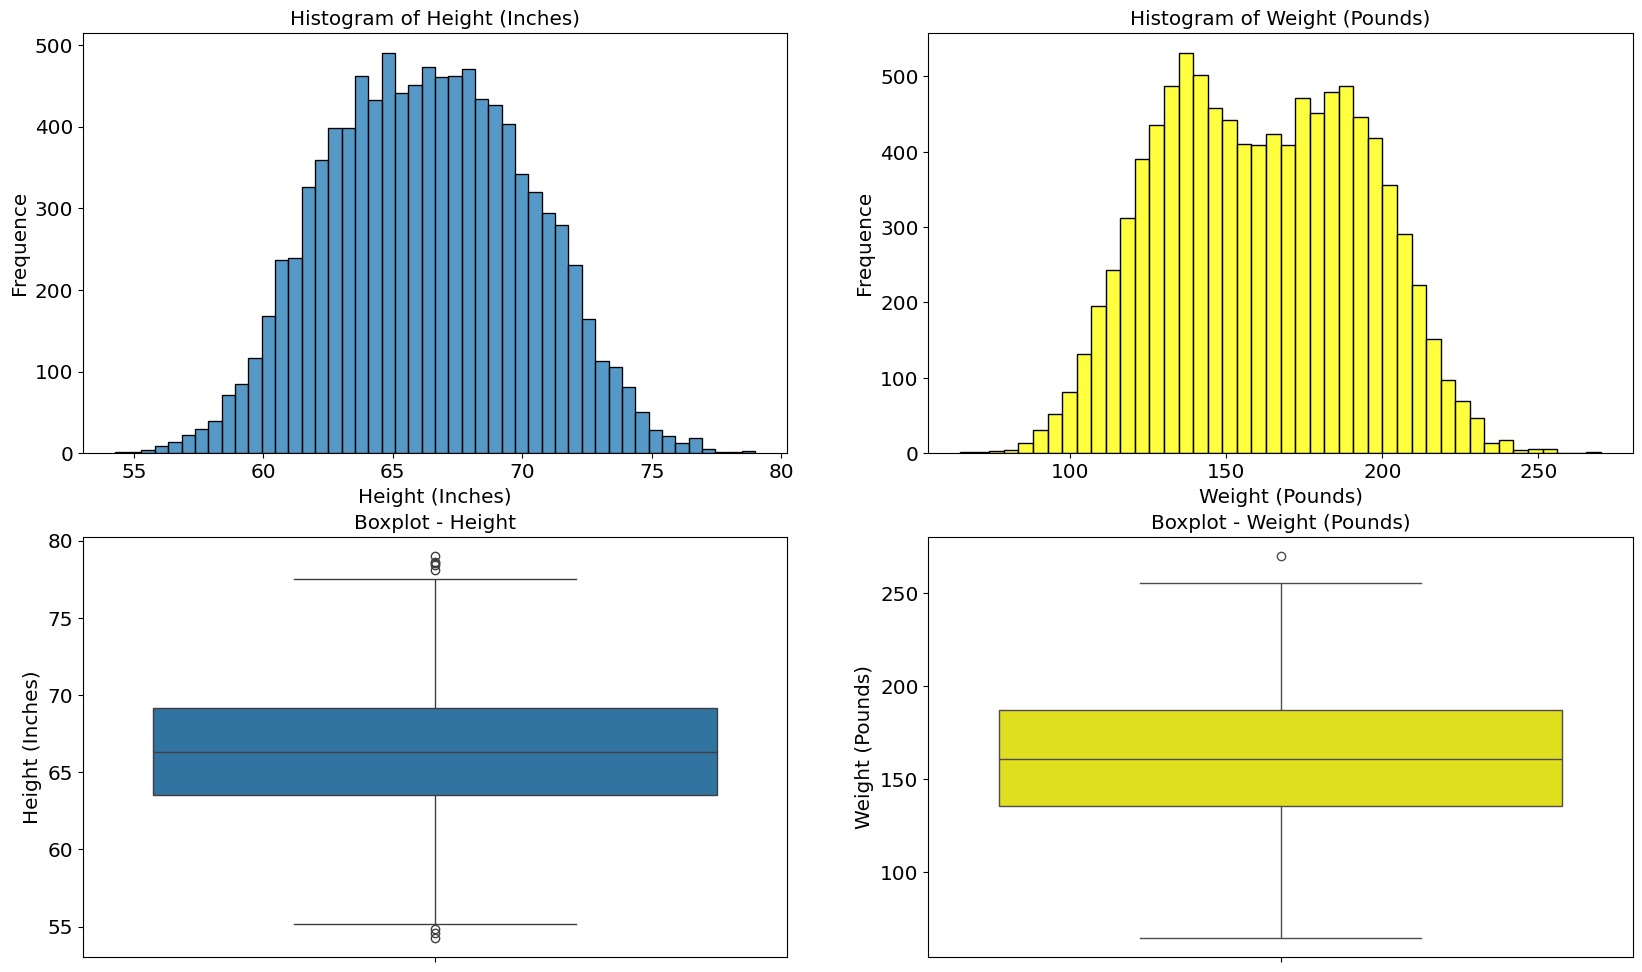

In [63]:
fig = plt.figure(figsize=(20, 12))

axis_1 = fig.add_subplot(2, 2, 1)
axis_1.set_title('Histogram of Height (Inches)')
axis_1.set_xlabel('Height (Inches)')
axis_1.set_ylabel('Frequence')
sns.histplot(data=df, x='Height', ax=axis_1)

axis_2 = fig.add_subplot(2, 2, 2)
axis_2.set_title('Histogram of Weight (Pounds)')
axis_2.set_xlabel('Weight (Pounds)')
axis_2.set_ylabel('Frequence')
sns.histplot(data=df, x='Weight', ax=axis_2, color="yellow")

axis_3 = fig.add_subplot(2, 2, 3)
axis_3.set_title('Boxplot - Height')
axis_3.set_ylabel('Height (Inches)')
sns.boxplot(data=df, y='Height', orient='v', ax=axis_3)

axis_4 = fig.add_subplot(2, 2, 4)
axis_4.set_title('Boxplot - Weight (Pounds)')
axis_4.set_ylabel('Weight (Pounds)')
sns.boxplot(data=df, y='Weight', orient='v', color="yellow", ax=axis_4)

### 1.4 Correlation Matrix

The **correlation coefficient** measures the _linear association_ between two variables. Its value ranges from **_-1_** (perfect negative association) and **_+1_** (perfect positive association).
<img src="imgs/correlation_coefficient.png" width="70%" />

Source: https://dataz4s.com/statistics/correlation-coefficient/

<Axes: xlabel='Height', ylabel='Weight'>

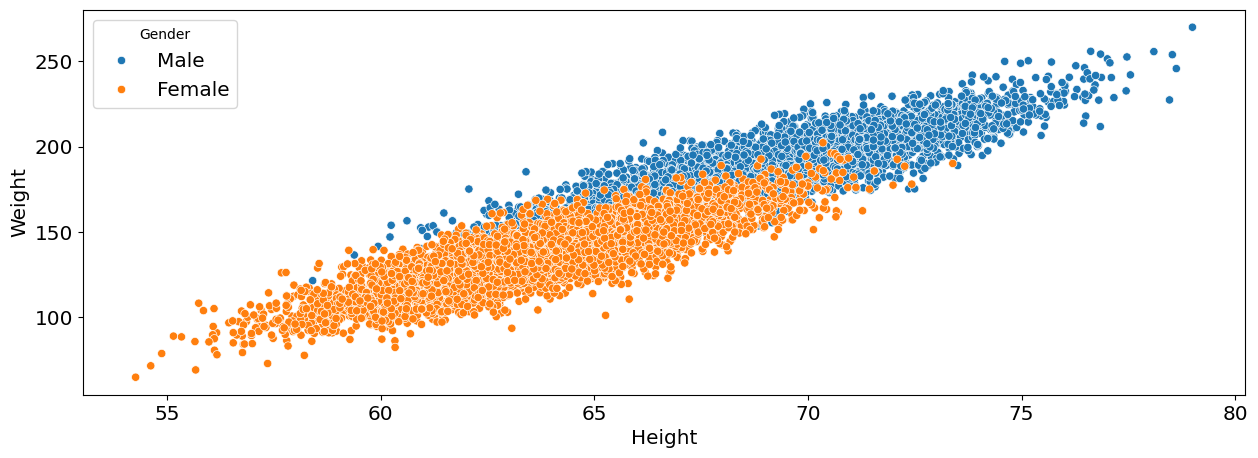

In [22]:
sns.scatterplot(data=df, x='Height', y='Weight') # Permite visualizar a relação entre os meus dados
# Isso me possibilita decidir qual o melhor modelo

In [64]:
df.corr() # Mostra o grau de correlação entre os dados

,Height,Weight
Height,1.000000,0.924756
Weight,0.924756,1.000000


## 2. Dependent Variable (y) vs Independent Variables

### `pairplot`

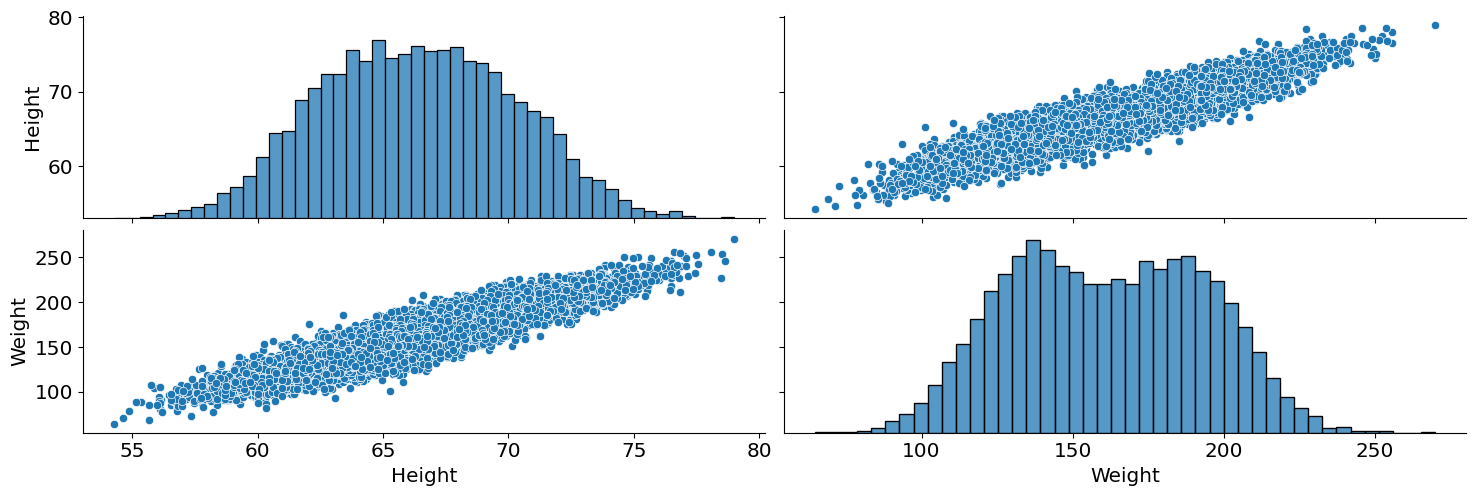

In [65]:
sns.pairplot(df, aspect=3) # junta o gráfico de correlação e o de histograma

### `jointplot`

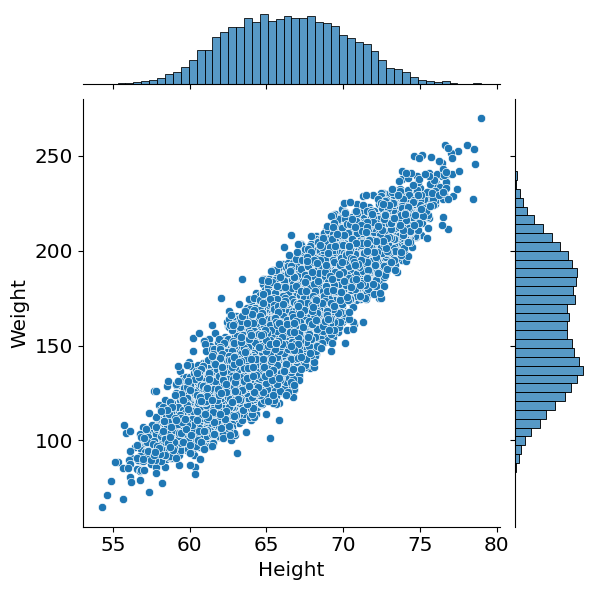

In [66]:
sns.jointplot(data=df, x='Height', y='Weight')

### `jointplot` with the estimated regression line

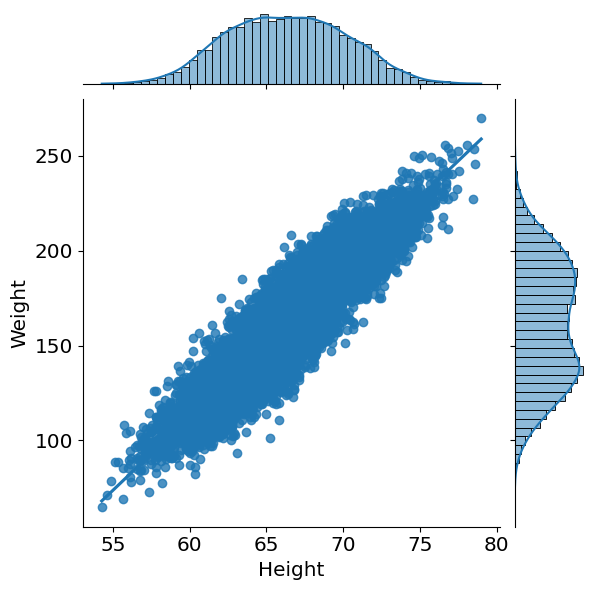

In [67]:
sns.jointplot(data=df, x='Height', y='Weight', kind='reg')

### `lmplot`
Plots the regression line between two variables together with their respective dispersions.

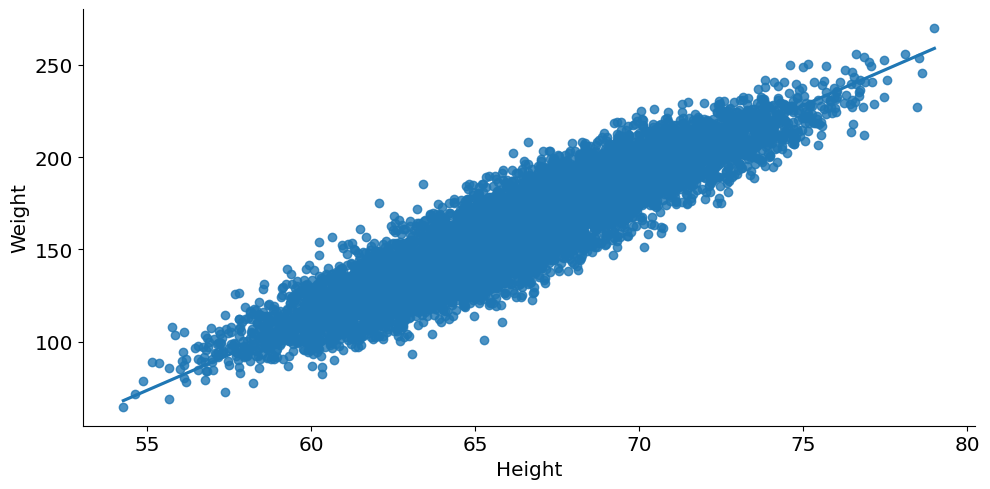

In [68]:
sns.lmplot(data=df, x='Height', y='Weight', aspect=2)

## 3. Estimating a Linear Regressor


### 3.1. Extracting the independent and dependent variables

In [69]:
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


#### Creating a DataFrame to store the independent/explanatory variables: Feature Matrix (X)
NB: we could use a numpy array instead.

In [70]:
X = df[['Height']] # 2 colchetes para pegar como dataframe
X

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796
...,...
9995,66.172652
9996,67.067155
9997,63.867992
9998,69.034243


In [71]:
X_npy = X.values # Converter de DataFrame para array numpy, p/ não dar erro nos cálculos
X_npy

array([[73.84701702],
       [68.78190405],
       [74.11010539],
       ...,
       [63.86799221],
       [69.03424313],
       [61.94424588]])

#### Creating a Series to store the dependent variable (y)

In [72]:
y = df['Weight']
y

,Weight
0,241.893563
1,162.310473
2,212.740856
3,220.042470
4,206.349801
...,...
9995,136.777454
9996,170.867906
9997,128.475319
9998,163.852461


In [73]:
y_npy = y.values
y_npy

array([241.89356318, 162.31047252, 212.74085556, ..., 128.47531878,
       163.85246135, 113.64910268])

### 3.2 Splitting the dataset into Training Set and Test Set
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42) # dividir os dados entre treino e teste para a IA

#### Checking training and test set sizes

In [76]:
print(f'X_train.shape = {X_train.shape}')
print(f'Y_train.shape = {y_train.shape}')

X_train.shape = (8000, 1)
Y_train.shape = (8000,)


In [77]:
print(f'X_test.shape = {X_test.shape}')
print(f'y_test.shape = {y_test.shape}')

X_test.shape = (2000, 1)
y_test.shape = (2000,)


### 3.3. Training the Simple Linear Regression Model with the Training Set
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [78]:
from sklearn.linear_model import LinearRegression

In [79]:
reg = LinearRegression()
reg

LinearRegression()

In [80]:
reg.fit(X_train, y_train) # ajuste à divisão de treino e teste (nesse contexto, significa treinar)

LinearRegression()

In [81]:
reg.intercept_ # theta_0 -> coeficiente linear

np.float64(-349.7878205824451)

In [82]:
reg.coef_ # theta_1 -> coeficiente angular

array([7.70218561])

A partir do conjunto de treinamento estabelecido, nossa reta é então: <br/>
**h(x) = -349.7878205824451 + 7.70218561 * x**

Para uma altura de 0, o peso seria de -349.7878205824451 libras. E a cada polegada de altura, a pessoa ganha 7.70218561 libras

## 3.4 Coefficient of determination (R²) of the linear model estimated with the Training Set

The coefficient of determination (R²) is a summary measure that tells you _how well the regression line fits the data_. <br/>
The coefficient of determination (R²) measures how well a _statistical model_ predicts an _outcome_. The _outcome_ is represented by the _model’s dependent variable_. <br/>
It is a value (generally) between 0 and 1.

It represents the _proportion of total variability_ of the $y$-value that is accounted for by the **independent variable $x$**.

Eg R² = 0.8234 means that the linear model explains 82.34% of the variance of the dependent variable from the regressors (independent variables) included in that linear model.

Broadly speaking:

| **Coefficient of determination (R²)** | **Interpretation**                            |
|---------------------------------------|-----------------------------------------------|
| 0                                     | The model **does not** predict the outcome.   |
| Between 0 and 1                       | The model **partially** predicts the outcome. |
| 1                                     | The model **perfectly** predicts the outcome. |

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=1}^{m}(y^{(i)}-\hat{y}^{(i)})^2}{\sum_{i=1}^{m}(y^{(i)}-\bar{y})^2}$$

In [83]:
print(f'R² = {reg.score(X_train, y_train)}')
# se chegar acima de 95% de acurácia, tem algo de errado!
# É como se o modelo estivesse "decorando a informação"

R² = 0.8545053200432668


## 4. Predicting Salaries for Test Samples

### 4.1. Prediction

In [84]:
X_test

,Height
6252,68.687232
4684,68.829334
1731,66.398128
4742,71.929340
4521,67.042903
...,...
6412,65.748601
8285,60.731857
7853,62.188933
1095,67.068304


In [85]:
y_test

,Weight
6252,173.115813
4684,195.162042
1731,170.217451
4742,215.049660
4521,182.721452
...,...
6412,142.067438
8285,119.967881
7853,125.179380
1095,187.573494


In [86]:
y_pred = reg.predict(X_test)
y_pred

array([179.25399046, 180.34848321, 161.62288801, ..., 129.20288223,
       166.78470522, 101.81227499])

In [87]:
type(y_pred)

numpy.ndarray

In [88]:
y_pred.shape

(2000,)

In [89]:
results = pd.DataFrame({
    'Height (Inches)': X_test['Height'],
    'Weight (Prediction)': y_pred.round(2),
    'Weight (True)': y_test.round(2),
    'Erro (Residual)': (y_test - y_pred).round(2),
    'Erro (Absolute)': abs(y_test - y_pred).round(2)
})
# montando um dataframe para exibir meus resultados de forma mais elegante
results

,Height (Inches),Weight (Prediction),Weight (True),Erro (Residual),Erro (Absolute)
6252,68.687232,179.25,173.12,-6.14,6.14
4684,68.829334,180.35,195.16,14.81,14.81
1731,66.398128,161.62,170.22,8.59,8.59
4742,71.929340,204.23,215.05,10.82,10.82
4521,67.042903,166.59,182.72,16.13,16.13
...,...,...,...,...,...
6412,65.748601,156.62,142.07,-14.55,14.55
8285,60.731857,117.98,119.97,1.99,1.99
7853,62.188933,129.20,125.18,-4.02,4.02
1095,67.068304,166.78,187.57,20.79,20.79


The **residuals** inform how far the predictions are from the linear model.

In [91]:
results.describe() # informações estatísticas

,Height (Inches),Weight (Prediction),Weight (True),Erro (Residual),Erro (Absolute)
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,66.399073,161.630255,161.894780,0.264535,9.691835
std,3.855328,29.694449,32.370834,12.206819,7.422788
min,55.739737,79.530000,72.750000,-51.900000,0.000000
25%,63.425150,138.727500,134.792500,-7.952500,3.667500
50%,66.396236,161.605000,162.605000,0.185000,8.220000
75%,69.180671,183.055000,187.555000,8.405000,13.885000
max,78.095867,251.720000,255.690000,42.450000,51.900000


### 4.2. Visualizing the samples with the Linear Models

In [92]:
regression_line_x = X['Height']
regression_line_y = reg.predict(X)
regression_line_y

array([218.99561087, 179.98317065, 221.02196636, ..., 142.13530967,
       181.92673312, 127.31825835])

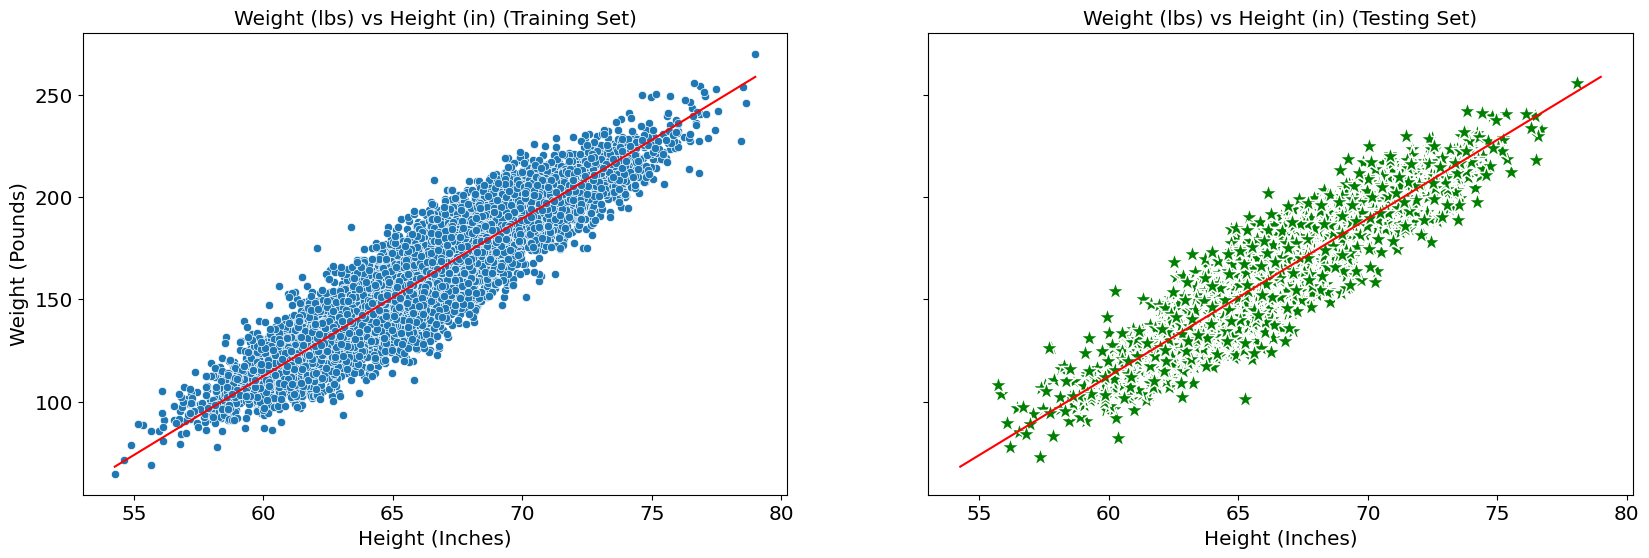

In [93]:
fig, axs = plt.subplots(1, 2, figsize=(20, 6), sharex=True, sharey=True)

regression_line_x = X['Height']
regression_line_y = reg.predict(X)

sns.scatterplot(x=X_train['Height'], y=y_train, ax=axs[0])
sns.lineplot(x=regression_line_x, y=regression_line_y, color="red", ax=axs[0])
axs[0].set_title('Weight (lbs) vs Height (in) (Training Set)')
axs[0].set_xlabel('Height (Inches)')
axs[0].set_ylabel('Weight (Pounds)')

sns.scatterplot(x=X_test['Height'], y=y_test, color="green", marker='*', s=200, ax=axs[1])
sns.lineplot(x=regression_line_x, y=regression_line_y, color="red", ax=axs[1])
axs[1].set_title('Weight (lbs) vs Height (in) (Testing Set)')
axs[1].set_xlabel('Height (Inches)')
axs[1].set_ylabel('Weight (Pounds)')

display()

In [94]:
X_labeled = X.copy()
X_labeled['Label'] = 'Train'
X_labeled
X_labeled.loc[X_test.index, 'Label'] = 'Test'
X_labeled

,Height,Label
0,73.847017,Test
1,68.781904,Train
2,74.110105,Train
3,71.730978,Test
4,69.881796,Train
...,...,...
9995,66.172652,Train
9996,67.067155,Train
9997,63.867992,Train
9998,69.034243,Test


Text(0, 0.5, 'Weight (Pounds)')

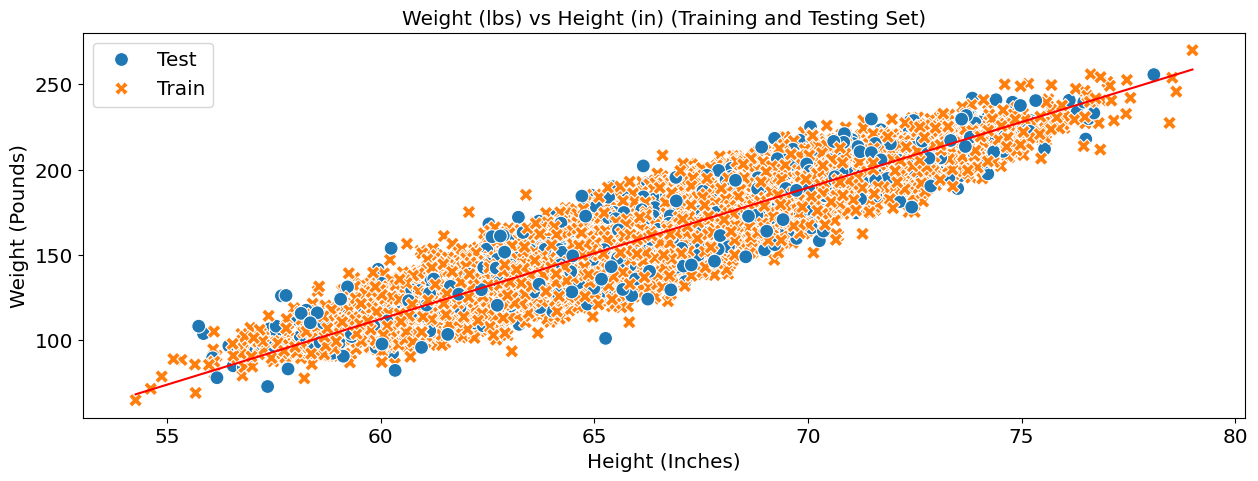

In [95]:
sns.scatterplot(data=X_labeled, x='Height', y=y, hue='Label', style='Label', s=100)
sns.lineplot(x=regression_line_x, y=regression_line_y, color="red")
plt.title('Weight (lbs) vs Height (in) (Training and Testing Set)')
plt.xlabel('Height (Inches)')
plt.ylabel('Weight (Pounds)')

## 5. Computing Evaluation Metrics

How much do the predictions obtained differ from the actual data?

### Mean Absolute Error (MAE)
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html

$$ MAE = \frac{1}{m}\sum_{i=1}^{m}|y^{(i)} - \hat{y}^{(i)}| $$

In [96]:
from sklearn.metrics import mean_absolute_error

In [97]:
MAE = mean_absolute_error(y_test, y_pred)
MAE

9.691933801884572

### Mean Squared Error (MSE)
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

$$ MSE = \frac{1}{m}\sum_{i=1}^{m}(y^{(i)} - \hat{y}^{(i)})^2 $$

Since the **errors** are squared before computing the _mean_, MSE weights **large errors** more than the MAE.

In [98]:
from sklearn.metrics import mean_squared_error

In [100]:
MSE = mean_squared_error(y_test, y_pred)
MSE

149.00350418448127

## Root Mean Squared Error (RMSE)
Square root of the MSE. <br/>
This is the metric commonly used to compare regression models.

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

In [101]:
from sklearn.metrics import root_mean_squared_error

In [102]:
RMSE_manually = np.sqrt(MSE)
RMSE_manually

np.float64(12.206699151878908)

In [103]:
RMSE = root_mean_squared_error(y_test, y_pred)
RMSE

12.206699151878908

##R2

In [104]:
reg.score(X_test, y_test)

0.8577317777038499

In [105]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.8577317777038499